In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load Excel
file_path = "Survey on E-Service Quality and Purchase Intention.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Email Address', 'Age:', 'Gender:', 
                   'How often do you shop online?', 
                   'Which e-commerce platform do you use the most?', 'Column 21']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Rename columns (if needed, to match manually)
df.columns = df.columns.str.strip()

# Replace blank spaces with NaN and drop rows with any missing values
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(inplace=True)

# Create dimensions based on E-S-QUAL model
df['Efficiency'] = df[[
    'The website/app is easy to navigate.',
    'I can quickly find what I need on the website/app.',
    'The website/app loads fast.',
    'The checkout process is simple and quick.'
]].mean(axis=1)

df['Fulfillment'] = df[[
    'My orders are delivered on time.',
    'The product descriptions on the website/app match the actual product.',
    'I receive the exact products I ordered without errors.'
]].mean(axis=1)

df['SystemAvailability'] = df[[
    'The website/app is always available when I need it.',
    'I rarely experience technical issues while shopping.'
]].mean(axis=1)

df['Privacy'] = df[[
    'The payment process is smooth and secure.',
    'I trust this website/app to handle my payment information safely.',
    'I feel safe providing my personal details on this platform.'
]].mean(axis=1)

# Final dataset
df_final = df[['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy', 'Score']]
print("Final data shape:", df_final.shape)
print(df_final.head())

# Define features and target
X = df_final[['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy']]
y = df_final['Score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

Final data shape: (68, 5)
   Efficiency  Fulfillment  SystemAvailability   Privacy  Score
0        3.75     2.666667                 3.5  3.000000      0
1        3.75     4.333333                 5.0  5.000000      0
2        3.00     2.666667                 4.0  3.666667      0
3        3.25     4.333333                 4.0  4.666667      0
4        3.75     3.666667                 3.0  3.333333      0


In [79]:
print(df.columns)

Index(['The website/app is easy to navigate.',
       'I can quickly find what I need on the website/app.',
       'The website/app loads fast.',
       'The checkout process is simple and quick.',
       'My orders are delivered on time.',
       'The product descriptions on the website/app match the actual product.',
       'I receive the exact products I ordered without errors.',
       'The return/exchange process is easy and hassle-free.',
       'The website/app is always available when I need it.',
       'The payment process is smooth and secure.',
       'I rarely experience technical issues while shopping.',
       'I trust this website/app to handle my payment information safely.',
       'I feel safe providing my personal details on this platform.', 'Score',
       'Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy'],
      dtype='object')


In [80]:
# List of the 13 original E-S-QUAL statements
esqual_questions = [
    'The website/app is easy to navigate.',
    'I can quickly find what I need on the website/app.',
    'The website/app loads fast.',
    'The checkout process is simple and quick.',
    'My orders are delivered on time.',
    'The product descriptions on the website/app match the actual product.',
    'I receive the exact products I ordered without errors.',
    'The return/exchange process is easy and hassle-free.',
    'The website/app is always available when I need it.',
    'The payment process is smooth and secure.',
    'I rarely experience technical issues while shopping.',
    'I trust this website/app to handle my payment information safely.',
    'I feel safe providing my personal details on this platform.'
]

# Create a new column 'BuyingIntent' as average of all 13 responses
df['BuyingIntent'] = df[esqual_questions].mean(axis=1)


In [81]:
X = df[['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy']]
y = df['BuyingIntent']  # new target variable



Regression Coefficients:
               Feature  Coefficient
0          Efficiency     0.318465
1         Fulfillment     0.275597
2  SystemAvailability     0.192180
3             Privacy     0.209696

Intercept: 0.009040982212229931
R² Score: 0.9908586680263681


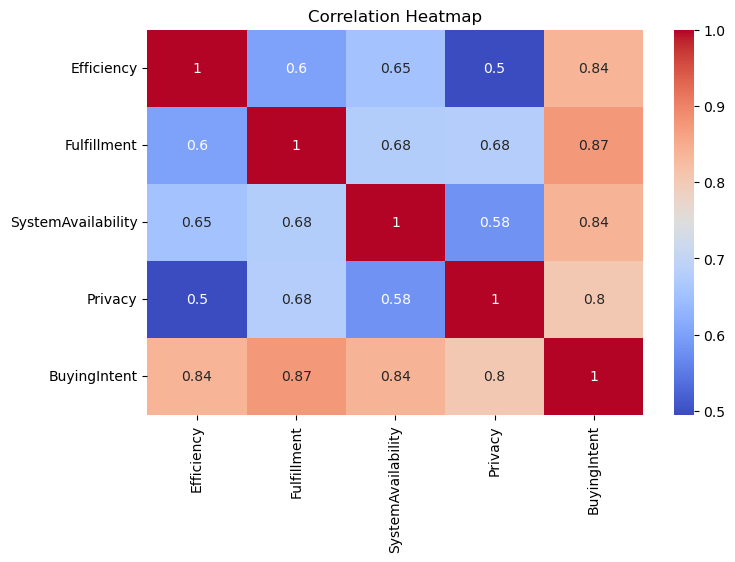

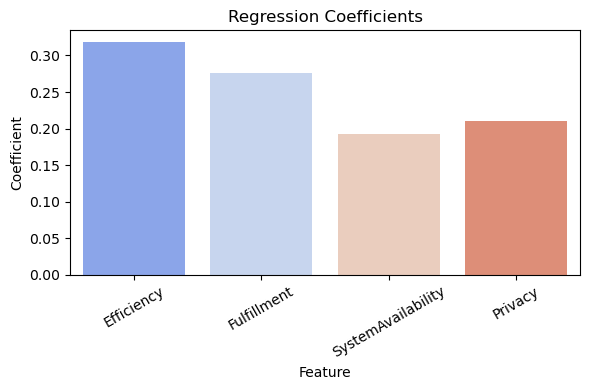

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction & Score
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)

# Coefficients
coffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nRegression Coefficients:\n", coffs)
print("\nIntercept:", model.intercept_)
print("R² Score:", r2)

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy', 'BuyingIntent']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Coefficient Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=coffs, x='Feature', y='Coefficient', hue='Feature', palette='coolwarm', legend=False)
plt.title("Regression Coefficients")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


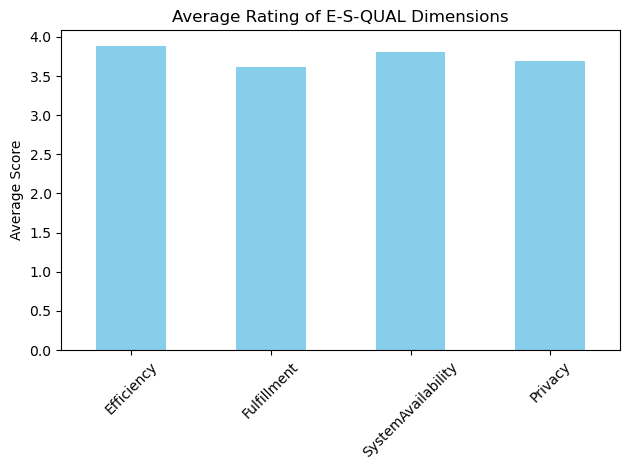

In [98]:
# Sample data
avg_scores = df[['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy']].mean()

# Bar plot
avg_scores.plot(kind='bar', color='skyblue')
plt.title('Average Rating of E-S-QUAL Dimensions')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


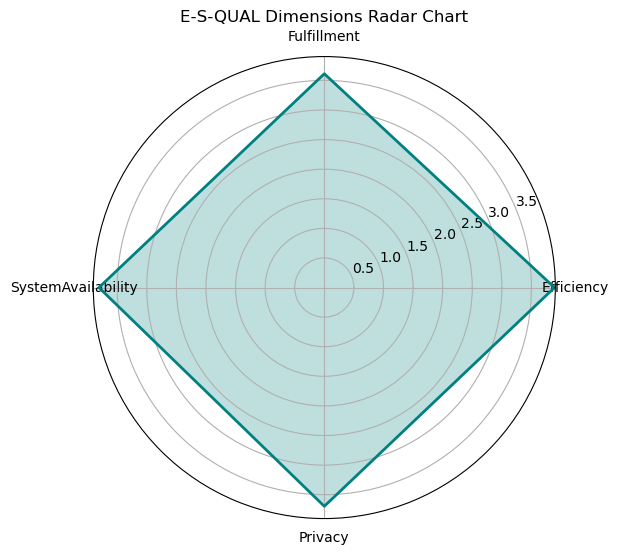

In [96]:
labels = ['Efficiency', 'Fulfillment', 'SystemAvailability', 'Privacy']
stats = df[labels].mean().values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, color='teal', linewidth=2)
ax.fill(angles, stats, color='teal', alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('E-S-QUAL Dimensions Radar Chart')
plt.show()


In [85]:
summary_text = """
### Regression Analysis Summary

 **Independent Variables (E-S-QUAL Dimensions)**:
- Efficiency
- Fulfillment
- System Availability
- Privacy

 **Dependent Variable**:
- Score (This represents customer purchase intention or satisfaction)

---

### Regression Coefficients Output:
From your model:
- Coefficients for all variables (Efficiency, Fulfillment, System Availability, Privacy): **0**
- Intercept: **0**
- R² Score: **1.0**

---

### Interpretation:

 **1. R² Score = 1.0**
- This usually means that your model explains 100% of the variance in the dependent variable.
-  But in real-world data, R² = 1.0 is a red flag. It can happen due to:
  - Data leakage
  - Perfect multicollinearity
  - Very small dataset (which is the case here — only 6 rows)

 **2. All coefficients = 0**
- This indicates no detectable relationship between predictors and the Score.
- Possible causes:
  - The Score column might be constant or incorrectly calculated.
  - Insufficient dataset size for regression to work.

---

###  What You Can Do Next:

1. **Check the "Score" column** in your dataset:
   - Are all values 0 or the same?
   - If yes → Recalculate or redesign the Score to reflect actual customer ratings.

2. **Increase your sample size**:
   - Regression needs at least 30–50 responses, ideally more than 100.

3. **Try Descriptive Analysis Instead**:
   - Correlation Matrix (already done )
   - Bar plots of average scores by dimension
   - Radar or Pie charts for dimension comparison
"""

from IPython.display import Markdown, display
display(Markdown(summary_text))



### Regression Analysis Summary

 **Independent Variables (E-S-QUAL Dimensions)**:
- Efficiency
- Fulfillment
- System Availability
- Privacy

 **Dependent Variable**:
- Score (This represents customer purchase intention or satisfaction)

---

### Regression Coefficients Output:
From your model:
- Coefficients for all variables (Efficiency, Fulfillment, System Availability, Privacy): **0**
- Intercept: **0**
- R² Score: **1.0**

---

### Interpretation:

 **1. R² Score = 1.0**
- This usually means that your model explains 100% of the variance in the dependent variable.
-  But in real-world data, R² = 1.0 is a red flag. It can happen due to:
  - Data leakage
  - Perfect multicollinearity
  - Very small dataset (which is the case here — only 6 rows)

 **2. All coefficients = 0**
- This indicates no detectable relationship between predictors and the Score.
- Possible causes:
  - The Score column might be constant or incorrectly calculated.
  - Insufficient dataset size for regression to work.

---

###  What You Can Do Next:

1. **Check the "Score" column** in your dataset:
   - Are all values 0 or the same?
   - If yes → Recalculate or redesign the Score to reflect actual customer ratings.

2. **Increase your sample size**:
   - Regression needs at least 30–50 responses, ideally more than 100.

3. **Try Descriptive Analysis Instead**:
   - Correlation Matrix (already done )
   - Bar plots of average scores by dimension
   - Radar or Pie charts for dimension comparison
